# Localización
Pregunta 1:
¿Cuál es el formato de la salida del generador cuando se ejecuta *next*?

Pregunta 2:
¿Cuantas neuronas tiene a la salida la Red Neuronal en este caso?

Pregunta 3:
Los pesos con los que se suman las funciones de costo son:

Pregunta 4:
¿Qué métrica se agrega para el caso de localización que no se utilizaba en el caso de clasificación?

# Cargamos Drive

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/object_detection_helper.py

--2021-09-26 14:25:40--  https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/object_detection_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19461 (19K) [text/plain]
Saving to: ‘object_detection_helper.py’

object_detection_he 100%[===================>]  19.00K  --.-KB/s    in 0.001s  

2021-09-26 14:25:41 (27.9 MB/s) - ‘object_detection_helper.py’ saved [19461/19461]



In [3]:
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/custom_losses.py

--2021-09-26 14:25:41--  https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/custom_losses.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852 (6.7K) [text/plain]
Saving to: ‘custom_losses.py’

custom_losses.py    100%[===================>]   6.69K  --.-KB/s    in 0s      

2021-09-26 14:25:41 (42.6 MB/s) - ‘custom_losses.py’ saved [6852/6852]



Hacer click en el siguiente link:

https://drive.google.com/open?id=1jP6eghPZv9-JSIOPQcQsjI0wGGmgyN4T

Agregarlo a tu drive con el icono de '+'

In [4]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Descompresión de dataset
! unzip "/content/drive/MyDrive/DeepLearning/Laboratorios/obj_det_dataset.zip" > /dev/null

# Cargamos Dataset y definimos Generator

In [6]:
reduced_dataset_folder = './challenge_dataset_v3'

In [7]:
train_folder = reduced_dataset_folder + '/images/train'
val_folder = reduced_dataset_folder + '/images/val'

In [8]:
annotations_dict_train = np.load(reduced_dataset_folder+'/annotations_train.npy', allow_pickle=True).flat[0]
annotations_dict_val = np.load(reduced_dataset_folder+'/annotations_val.npy', allow_pickle=True).flat[0]

In [9]:
classes = list(annotations_dict_train.keys())
print(classes)

['n02165456', 'n02226429', 'n01644373', 'n02279972', 'n01632458', 'n02256656', 'n01774384', 'n01770393']


In [11]:
from object_detection_helper import GeneratorMultipleOutputs, plot_batch

In [12]:
target_size=(320, 320)

In [13]:
train_generator_multiple_outputs = GeneratorMultipleOutputs(annotations_dict_train, 
                                                            train_folder, 10, classes = classes,
                                                            concat_output = False,
                                                            target_size=target_size
                                                           )
val_generator_multiple_outputs = GeneratorMultipleOutputs(annotations_dict_val, 
                                                              val_folder, 64, classes = classes,
                                                              concat_output = False,
                                                              target_size=target_size
                                                         )

Found 2400 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


In [ ]:
# [[images], [[one_hot], [bboxes]]]
next(train_generator_multiple_outputs)[0]

In [ ]:
next(train_generator_multiple_outputs)[1][0]

In [ ]:
next(train_generator_multiple_outputs)[1][1]

In [17]:
next(train_generator_multiple_outputs)[0].shape

(10, 320, 320, 3)

In [18]:
(next(train_generator_multiple_outputs)[1][0]).shape

(10, 8)

In [19]:
(next(train_generator_multiple_outputs)[1][1]).shape

(10, 4)

* Respuesta 1:

El formato de la salida del generador cuando se ejecuta *next* es:

``((batch_size, alto, ancho, canales), [(batch_size, clase_onehot), (batch_size, bounding_box)])``

```
( (10, 320, 320, 3), [ (10, 8) , (10, 4) ] )
```

# Verificamos los datos Graficando

[0.   0.   0.   0.   0.   1.   0.   0.   0.54 0.55 0.34 0.21]


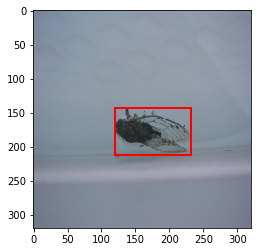

[0.   0.   0.   1.   0.   0.   0.   0.   0.44 0.54 0.62 0.83]


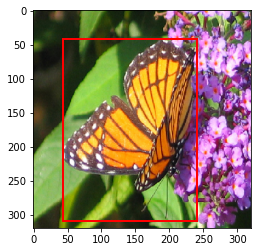

[0.   0.   0.   0.   0.   1.   0.   0.   0.21 0.61 0.33 0.7 ]


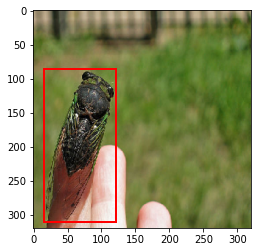

[0.   0.   0.   1.   0.   0.   0.   0.   0.37 0.48 0.33 0.61]


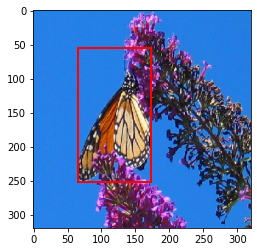

[0.   0.   0.   0.   0.   1.   0.   0.   0.53 0.54 0.89 0.74]


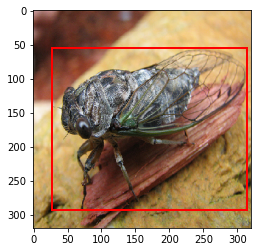

[0.   0.   1.   0.   0.   0.   0.   0.   0.55 0.61 0.46 0.48]


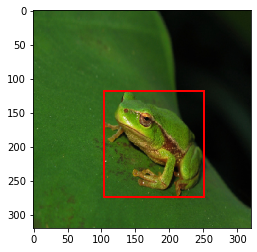

[0.   0.   0.   0.   1.   0.   0.   0.   0.47 0.53 0.65 0.31]


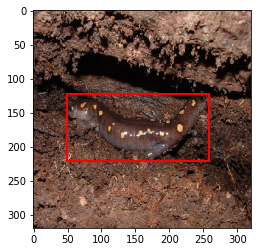

[0.   1.   0.   0.   0.   0.   0.   0.   0.49 0.51 0.99 0.94]


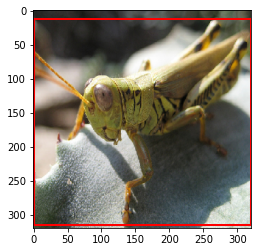

[0.   0.   0.   0.   0.   0.   1.   0.   0.42 0.49 0.53 0.47]


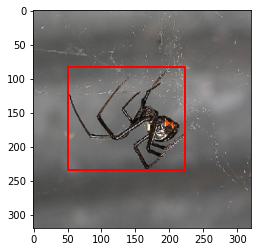

[0.   0.   0.   1.   0.   0.   0.   0.   0.54 0.52 0.89 0.95]


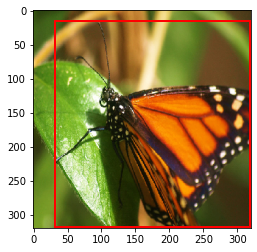

In [20]:
plot_batch(train_generator_multiple_outputs, count=10)

# ¿Cuantas neuronas tiene a la salida la Red Neuronal en este caso?

In [21]:
Neurona_A=(next(train_generator_multiple_outputs)[1][0][1]).shape
print(Neurona_A)

(8,)


In [22]:
Neurona_B=(next(train_generator_multiple_outputs)[1][1][1]).shape
print(Neurona_B)

(4,)


In [23]:
Neurona_Salida=(Neurona_A+Neurona_B)
print(Neurona_Salida)

(8, 4)


In [24]:
Neurona_Salida=sum(Neurona_Salida)
print(Neurona_Salida)

12


* Respuesta 2:

``8 clases + 4 bounding box = 12 Neuronas a la salida.``

# Armamos modelo basado en VGG-16

In [25]:
from keras.applications.vgg16 import VGG16

In [26]:
modelVGG16 = VGG16(include_top=False, weights='imagenet', input_shape=(*target_size, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [27]:
modelVGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0     

# Agregamos capas Densas

In [28]:
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.models import Model

In [29]:
# TODO #
n_classes = len(classes)
flatten_output = Flatten()(modelVGG16.output)
dense_1_output = Activation('relu')(Dense(128, name = 'Dense_1')(flatten_output))
dense_2_output = Activation('relu')(Dense(128, name = 'Dense_2')(dense_1_output))


class_prediction = Dense(n_classes, activation='softmax', name='category_output')(dense_2_output)
bbox_prediction = Dense(4, activation= "linear", name='bounding_box')(Dropout(0.5)(dense_2_output))

model = Model(inputs=modelVGG16.input, outputs=[class_prediction, bbox_prediction])

# Seteo capas entrenable

In [30]:
N_trainable = 17
print('primer capa entrenable:', model.layers[17].name)

for layer in model.layers[:N_trainable]:
    layer.trainable = False
for layer in model.layers[N_trainable:]:
    layer.trainable = True

primer capa entrenable: block5_conv3


In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 320, 320, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 320, 320, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 160, 160, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Metricas y función de Costo

# $L = \beta L_{categorical} + \gamma L_{boundingbox}$

# IoU (Intersección Over Union) o Indice de Jaccard

Ratio entre la union de las bounding boxes y la intersección

In [32]:
from custom_losses import IOU_loss, iou, set_classes

In [33]:
set_classes(n_classes)

In [34]:
losses = {"category_output": "categorical_crossentropy", 
          "bounding_box": "mean_squared_error"
         }
metrics = {"category_output": "accuracy", 
           "bounding_box": [iou]
          }
lossWeights = {"category_output": 1.0, 
               "bounding_box":  20.0,
              }

* Respuesta 3:

``La regresión se pesa 20 veces más que la entropía cruzada``
```
category_output= 1.0 y bounding_box= 20.0
```

* Respuesta 4:

```La métrica que se agrega para el caso de localización que no se utilizaba en el caso de clasificación es: [iou]```

In [35]:
train_generator_multiple_outputs = GeneratorMultipleOutputs(annotations_dict_train, 
                                                            train_folder, 50, classes = classes,
                                                            concat_output = False,
                                                            flip = 'random',
                                                            target_size=target_size
                                                           )
val_generator_multiple_outputs = GeneratorMultipleOutputs(annotations_dict_val, 
                                                              val_folder, 50, classes = classes,
                                                              concat_output = False,
                                                              flip = 'random',
                                                          target_size=target_size
                                                         )

Found 2400 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


In [36]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam, rmsprop, SGD
filename = 'runtime'
checkpoint = ModelCheckpoint(filepath = filename+'_best.hdf5', 
                             monitor='val_loss', save_best_only=True) #monitor='bounding_box_IOU_loss'
model.compile(loss=losses,
              optimizer=Adam(lr=0.001),
              metrics=metrics,
              loss_weights = lossWeights)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
from object_detection_helper import PlotLosses

### Esto puede tardar alrededor de una hora asi que siga adelante con la siguiente práctica mientras tanto

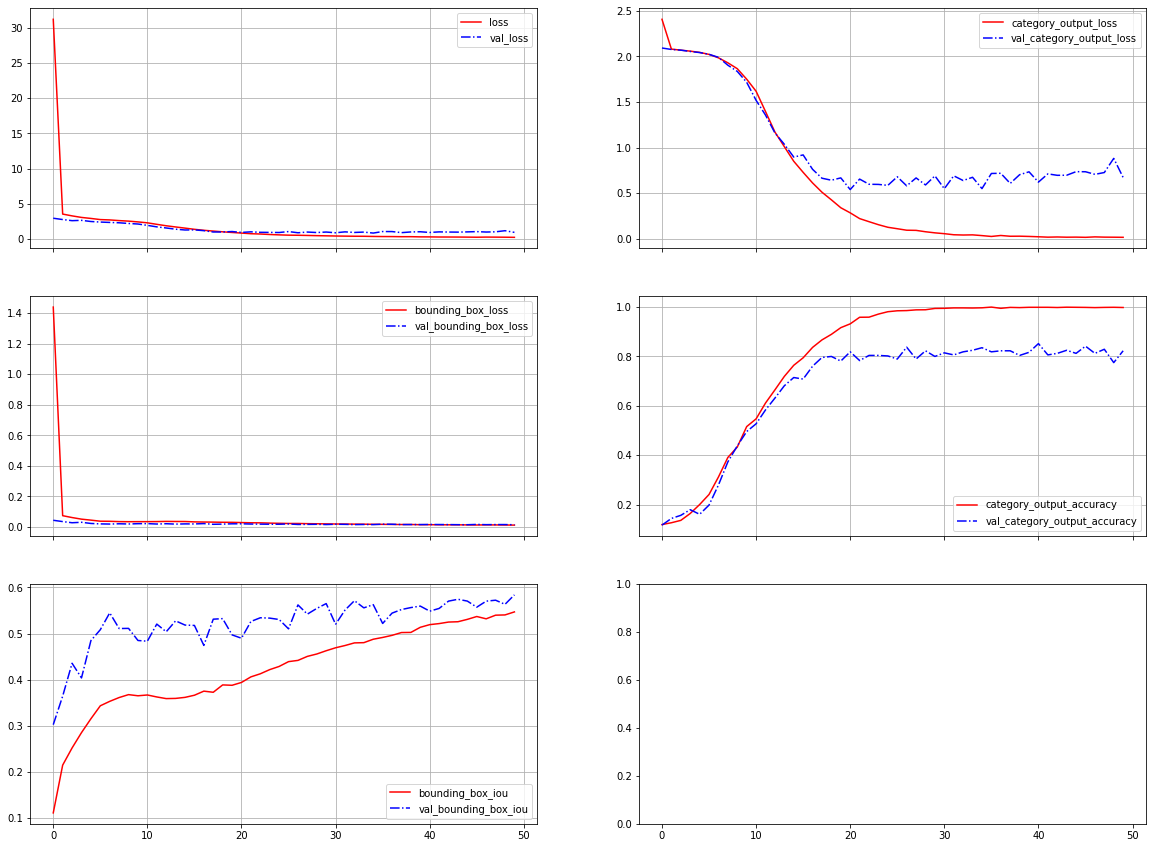

In [38]:
plot_losses = PlotLosses(1)
model.fit_generator(
        train_generator_multiple_outputs,
        #steps_per_epoch=steps_per_epoch,
        epochs=50,
        validation_data=val_generator_multiple_outputs, callbacks = [plot_losses, checkpoint]
        )

In [39]:
model.load_weights('runtime_best.hdf5')

In [40]:
model.evaluate_generator(val_generator_multiple_outputs)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.9454421997070312,
 0.6367871761322021,
 0.01543274987488985,
 0.824999988079071,
 0.5586659908294678]

Class OK: 7
IOU: [0.70085171]


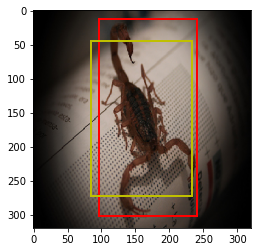

Class OK: 3
IOU: [0.76165577]


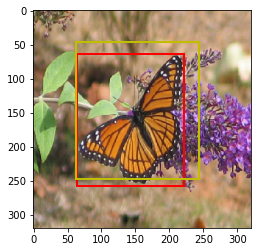

Class OK: 0
IOU: [0.54893479]


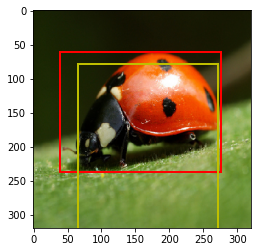

Class OK: 4
IOU: [0.51843792]


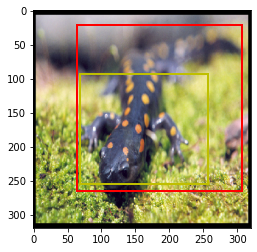

Class OK: 7
IOU: [0.76680129]


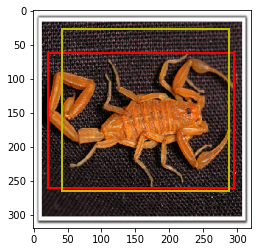

Class OK: 7
IOU: [0.78773156]


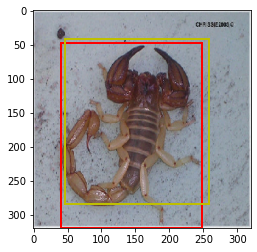

Class OK: 3
IOU: [0.50107913]


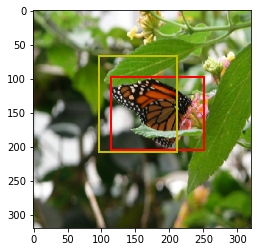

Class OK: 2
IOU: [0.43416428]


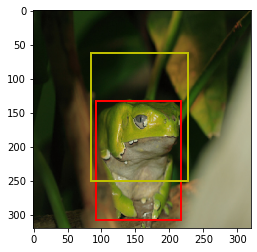

Class Failed: 1 7
IOU: [0.7854942]


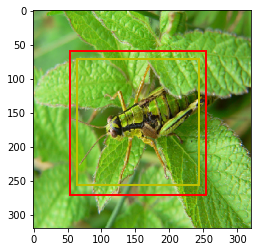

Class OK: 7
IOU: [0.56832923]


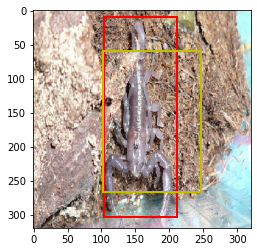

In [41]:
plot_batch(val_generator_multiple_outputs, model, count=10)